In [10]:
import numpy as np
from matplotlib import pyplot as plt
import sys
import numpy as np
sys.path.append('home/dmitrij/Documents/HDE_Code_Folder/FM_Eikonal/src/')
sys.path.append('../src/')
from Fast_Marching_Cython import Fast_Marching_Eikonal
from Graph_Build import Adj_Unnormalized
from scipy.ndimage.filters import gaussian_filter as gaussian 

/tmp/ipykernel_72527/1761357967.py:9: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter as gaussian


# Prepare Inputs for FM Algorithm

In [11]:
' Take the middle index as sink location to start the front propagation ' 

shape = (100,100)
Indices = np.array([shape[0]*shape[0]//2+shape[0]//2]).astype(np.intc) 

' Prepare grid containing arriving times set to infinity for initialization '

Ad = Adj_Unnormalized(shape)
Test_new = np.ones(shape)*1e10
Test_new.reshape(-1)[Indices] = 0
Test_new_2 = np.ones(shape)*1e10
Test_new_2.reshape(-1)[Indices] = 0
Test_new_3 = np.ones(shape)*1e10
Test_new_3.reshape(-1)[Indices] = 0
Ind = np.zeros((Indices.shape[0],2)).astype(np.intc)
Ind[:,0] = Indices
Ind[:,1] = 1

In [12]:
' Setup uniform velocity for front propagation '

Vel = np.ones(Test_new.shape[0:2])

In [13]:

Test_Active_List_one,Test_Active_Val_one = Fast_Marching_Eikonal.Eikonal_Eq_Solve_Cython(Test_new_2.reshape(-1),Vel.reshape(-1),Ad.data,Ad.indices,Ad.indptr,Ind,p = 1.0)
Test_Active_List_euc,Test_Active_Val_euc = Fast_Marching_Eikonal.Eikonal_Eq_Solve_Cython(Test_new_3.reshape(-1),Vel.reshape(-1),Ad.data,Ad.indices,Ad.indptr,Ind,p = 2.0)
Test_Active_List_inf,Test_Active_Val_inf = Fast_Marching_Eikonal.Eikonal_Eq_Solve_Cython(Test_new.reshape(-1),Vel.reshape(-1),Ad.data,Ad.indices,Ad.indptr,Ind,p = 3.0)

Computation finished in ___0.8568127155303955___seconds
Computation finished in ___0.7609081268310547___seconds
Computation finished in ___0.4506189823150635___seconds


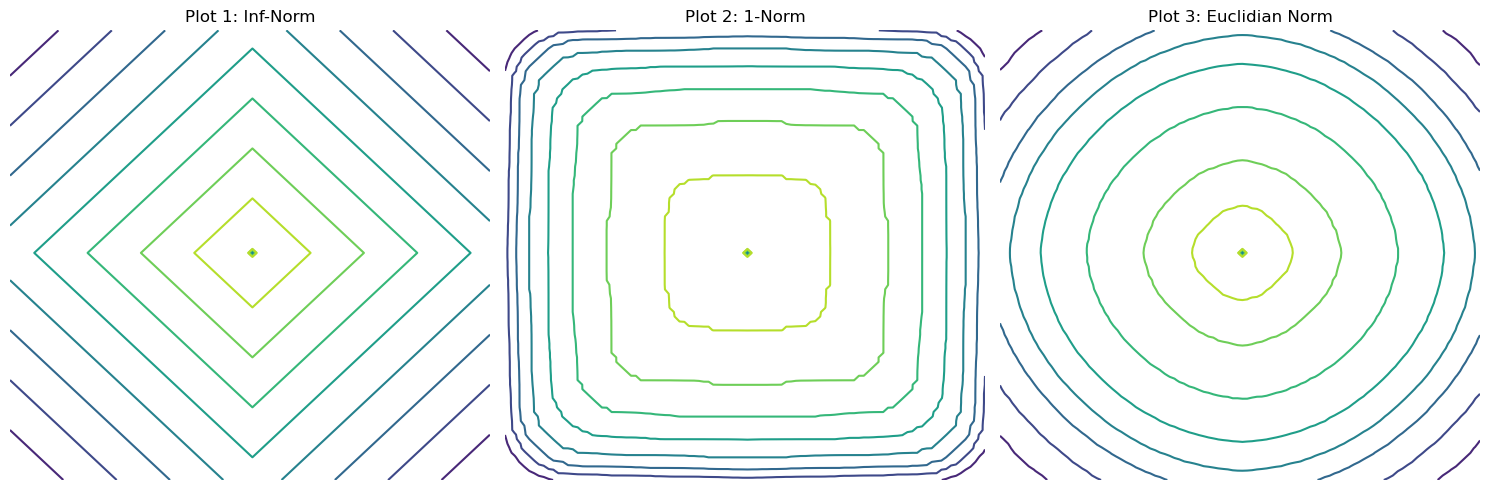

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.measure import find_contours



# Generate Heat Maps
Heat_Map = np.zeros(Test_new.shape)
Heat_Map.reshape(-1)[Test_Active_List_inf] = Test_Active_Val_inf[::-1]
Heat_Map_2 = np.zeros(Test_new.shape)
Heat_Map_2.reshape(-1)[Test_Active_List_one] = Test_Active_Val_one[::-1]
Heat_Map_3 = np.zeros(Test_new.shape)
Heat_Map_3.reshape(-1)[Test_Active_List_euc] = Test_Active_Val_euc[::-1]

# Define levels for contours
levels = np.linspace(np.min(Heat_Map), np.max(Heat_Map), 10)
levels_2 = np.linspace(np.min(Heat_Map_2), np.max(Heat_Map_2), 10)
levels_3 = np.linspace(np.min(Heat_Map_3), np.max(Heat_Map_3), 10)

# Create figure and axes
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Heat Map Contours
contours1 = axs[0].contour(Heat_Map, levels=levels, cmap='viridis')
axs[0].set_title("Plot 1: Inf-Norm")
axs[0].set_xlabel("X-axis")
axs[0].set_ylabel("Y-axis")
axs[0].axis('off')
#fig.colorbar(contours1, ax=axs[0])

# Plot 2: Heat Map Contours
contours2 = axs[1].contour(Heat_Map_2, levels=levels_2, cmap='viridis')
axs[1].set_title("Plot 2: 1-Norm")
axs[1].set_xlabel("X-axis")
axs[1].axis('off')
#fig.colorbar(contours2, ax=axs[1])

# Plot 3: Heat Map Contours
contours3 = axs[2].contour(Heat_Map_3, levels=levels_3, cmap='viridis')
axs[2].set_title("Plot 3: Euclidian Norm")
axs[2].set_xlabel("X-axis")
axs[2].axis('off')
#fig.colorbar(contours3, ax=axs[2])

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig("contour_plots.png")  # Save the figure as a PNG
plt.show()


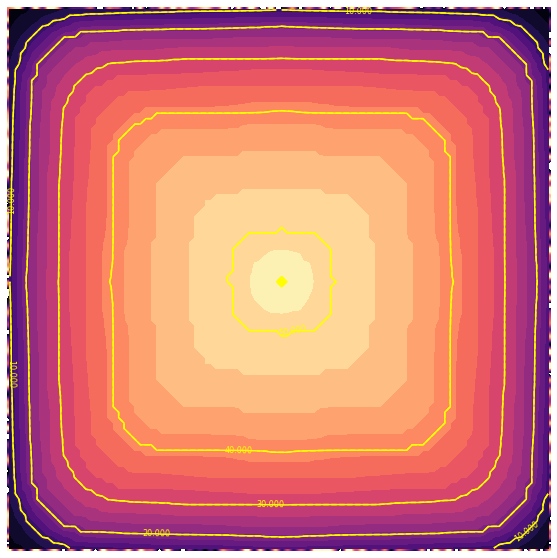

In [467]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
grid = np.random.uniform(0, 100, (100, 100))
heatmap = plt.imshow(grid, cmap='magma', interpolation='lanczos')
# Filled contour plot for better visualization
plt.contourf(Heat_Map, levels=20, cmap='magma')
levels = [i for i in range(0,70, 10)]
contours = plt.contour(Heat_Map, levels=levels, colors='yellow', linestyles='dashed')

# Add a thicker solid line at level 0 if applicable
plt.contour(Heat_Map, levels=levels, colors='yellow', linewidths=1.5)

# Label the contour lines directly
plt.clabel(contours, inline=True, fontsize=8)
plt.axis("off")


plt.show()


In [42]:
import imageio
import matplotlib.cm as cm
import matplotlib
# Create an array to store the generated frames
frames = []

# Generate the random grid for the heatmap
grid = np.random.uniform(0, 100, (100, 100))

# Define the levels for contour lines
levels_list = range(0,72,10)  # Different levels for each frame

# Generate frames for different levels
for levels_end in reversed(levels_list):
    levels = [i for i in range(0,levels_end, 10)]
    print(levels_end)
    #print(int(levels/10))
    Heat_Map_aux = Heat_Map.copy()
    Heat_Map_aux[np.where(Heat_Map_aux<levels_end)] = -1
    fig, ax = plt.subplots(figsize=(10, 10))
    cmap = cm.get_cmap('magma')
    n=80-levels_end
    white = np.ones((1,4))
    upper = cmap(np.linspace(0, 1, 72))
    colors = np.vstack((white, upper))
    tmap = matplotlib.colors.LinearSegmentedColormap.from_list('map_white', colors)
    #Heat_Map_aux.reshape(-1)[Mask[0]] = 0

    # Display heatmap
    # Filled contour plot
    ax.contourf(Heat_Map_aux, levels=20, cmap = tmap,vmin=0, vmax=100)

    # Dashed contour lines


    # Solid lines for contour (same levels)
    if levels_end == 70:
        contours = ax.contour(Heat_Map_aux, levels=10, linestyles='dashed',cmap=tmap)
    ax.contour(Heat_Map_aux, levels=10, colors='yellow', linewidths=1.5)
    # Label the contour lines
    #ax.clabel(contours, inline=True, fontsize=8)

    # Remove axis for clean visuals
    ax.axis("off")
    plt.tight_layout()
    #plt.colorbar(Heat_Map_aux)
    # Save the current figure as an image and add it to frames list
    plt.savefig('frame.png')
    frames.append(imageio.imread('frame.png'))

    # Close the figure to save memory
    plt.close()

# Create a GIF from the frames
imageio.mimsave('FM_L_inf.gif', frames, fps=3)

print("GIF has been created!")

70


/tmp/ipykernel_69381/2109324756.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('magma')


60
50
40
30
20
10
0
GIF has been created!


No SVG found in the HTML file.
